In [278]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn.metrics import accuracy_score

In [299]:
train = pd.read_csv('./data/train.csv')
train.head()


,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [300]:
test = pd.read_csv('./data/test.csv')
test.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers
2,0019_01,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez


In [302]:
train[['deck', 'num', 'side']] = train['Cabin'].str.split('/', expand=True)
test[['deck', 'num', 'side']] = test['Cabin'].str.split('/', expand=True)
train['TravelGroup'] = train['PassengerId'].str.split('_', expand=True)[0].astype('category')
train=train.drop(["Cabin","num"],axis=1)
test=test.drop(["Cabin","num"],axis=1)

In [303]:
train.VIP.fillna(False, inplace=True)
train.RoomService.fillna(0, inplace=True)
train.FoodCourt.fillna(0, inplace=True)
train.ShoppingMall.fillna(0, inplace=True)
train.Spa.fillna(0, inplace=True)
train.VRDeck.fillna(0, inplace=True)
train.CryoSleep.fillna(False, inplace=True)
train.Age.fillna(train.Age.mean(), inplace=True)


In [304]:
train_y = train.Transported.apply(lambda t: 1 if t == True else 0)
train = train.assign(Transported=train_y)


In [294]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 16 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Destination   8511 non-null   object 
 4   Age           8514 non-null   float64
 5   VIP           8490 non-null   object 
 6   RoomService   8512 non-null   float64
 7   FoodCourt     8510 non-null   float64
 8   ShoppingMall  8485 non-null   float64
 9   Spa           8510 non-null   float64
 10  VRDeck        8505 non-null   float64
 11  Name          8493 non-null   object 
 12  Transported   8693 non-null   bool   
 13  deck          8494 non-null   object 
 14  side          8494 non-null   object 
 15  TravelGroup   8693 non-null   int32  
dtypes: bool(1), float64(6), int32(1), object(8)
memory usage: 993.4+ KB


In [305]:
train.TravelGroup

0       0001
1       0002
2       0003
3       0003
4       0004
        ... 
8688    9276
8689    9278
8690    9279
8691    9280
8692    9280
Name: TravelGroup, Length: 8693, dtype: category
Categories (6217, object): ['0001', '0002', '0003', '0004', ..., '9276', '9278', '9279', '9280']

<AxesSubplot:xlabel='Transported', ylabel='count'>

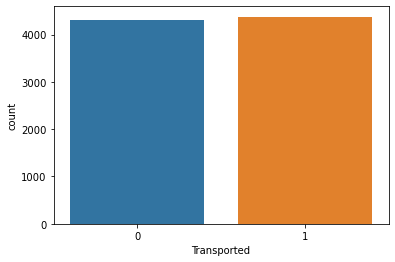

In [9]:
sns.countplot(x='Transported', data=train)

<AxesSubplot:xlabel='HomePlanet', ylabel='count'>

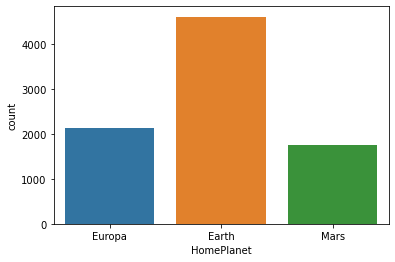

In [86]:
sns.countplot(x='HomePlanet', data=train)

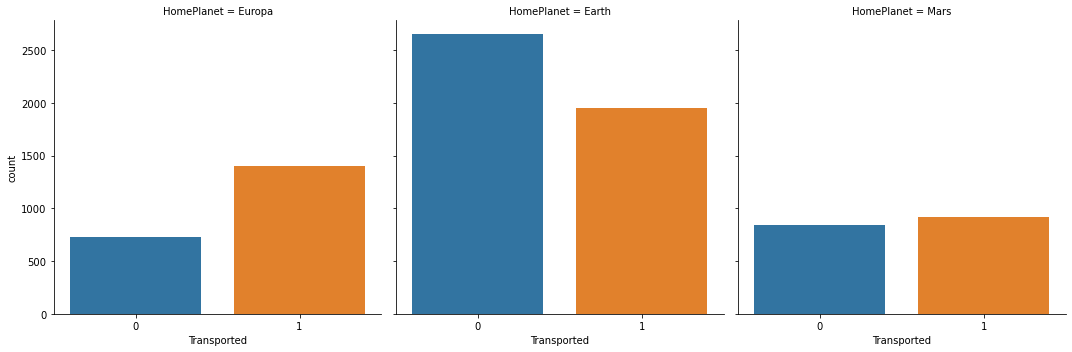

In [89]:
sns.catplot(x='Transported', col='HomePlanet', kind='count', data=train)

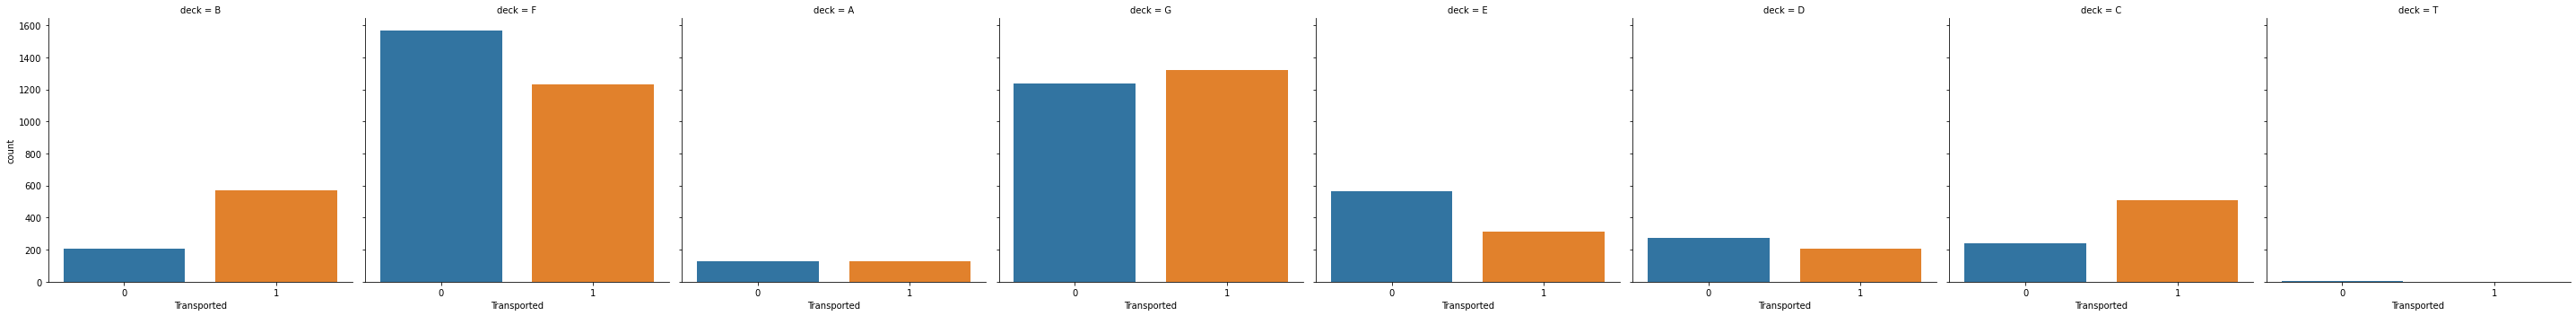

In [12]:
sns.catplot(x='Transported', col='deck', kind='count', data=train)


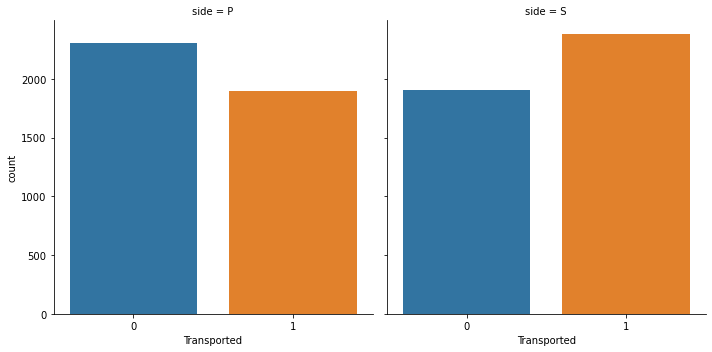

In [13]:
sns.catplot(x='Transported', col='side', kind='count', data=train)


In [72]:
train.Transported.value_counts()

1    4378
0    4315
Name: Transported, dtype: int64

In [93]:
train.groupby(['HomePlanet'])

In [94]:
train.groupby(['HomePlanet']).Transported.sum()

HomePlanet
Earth     1951
Europa    1404
Mars       920
Name: Transported, dtype: int64

In [55]:
mars = train[train.HomePlanet_Mars == 1]

In [56]:
mars

,PassengerId,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,...,deck_A,deck_B,deck_C,deck_D,deck_E,deck_F,deck_G,deck_T,side_P,side_S
12,0009_01,False,TRAPPIST-1e,32.0,False,73.0,0.0,1123.0,0.0,113.0,...,0,0,0,0,0,1,0,0,1,0
16,0014_01,False,55 Cancri e,27.0,False,1286.0,122.0,0.0,0.0,0.0,...,0,0,0,0,0,1,0,0,1,0
18,0016_01,True,TRAPPIST-1e,45.0,False,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,1,0,0,1,0
27,0022_01,False,TRAPPIST-1e,21.0,False,980.0,2.0,69.0,0.0,0.0,...,0,0,0,1,0,0,0,0,1,0
31,0028_01,False,TRAPPIST-1e,43.0,False,1125.0,0.0,136.0,48.0,0.0,...,0,0,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8654,9231_02,False,TRAPPIST-1e,0.0,False,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,1,0,0,1,0
8655,9231_03,False,TRAPPIST-1e,22.0,False,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,1,0,0,0,1,0
8660,9239_01,False,TRAPPIST-1e,14.0,False,2.0,0.0,918.0,128.0,0.0,...,0,0,0,0,1,0,0,0,1,0
8661,9241_01,False,TRAPPIST-1e,30.0,False,699.0,0.0,600.0,0.0,0.0,...,0,0,0,0,1,0,0,0,1,0


C:\Users\c3a1r\anaconda3\envs\ML\lib\site-packages\seaborn\categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


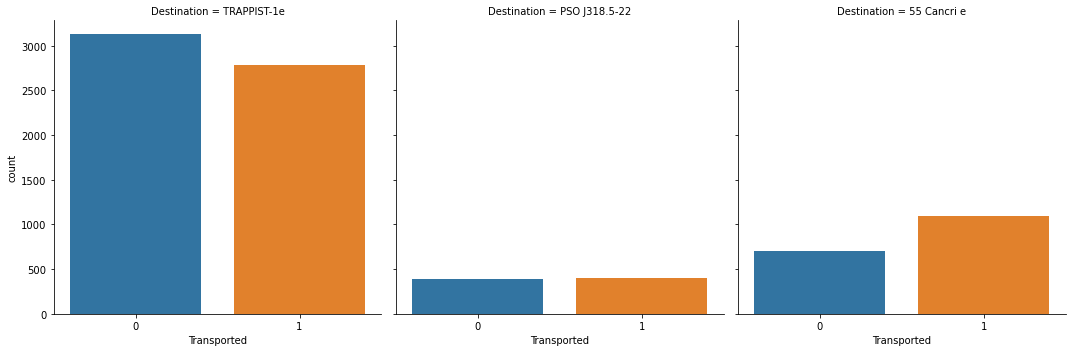

In [15]:
sns.factorplot(x='Transported', col='Destination', kind='count', data=train)

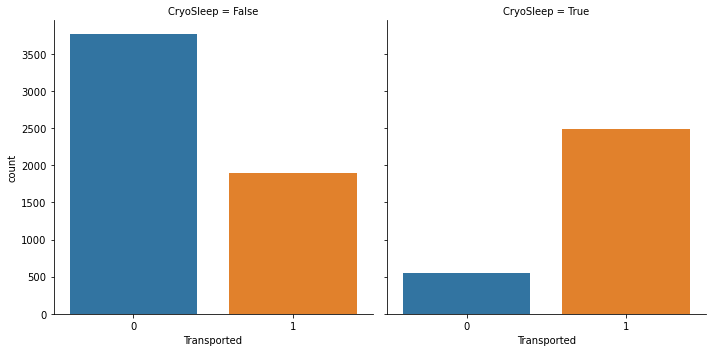

In [16]:
sns.catplot(x='Transported', col='CryoSleep', kind='count', data=train)


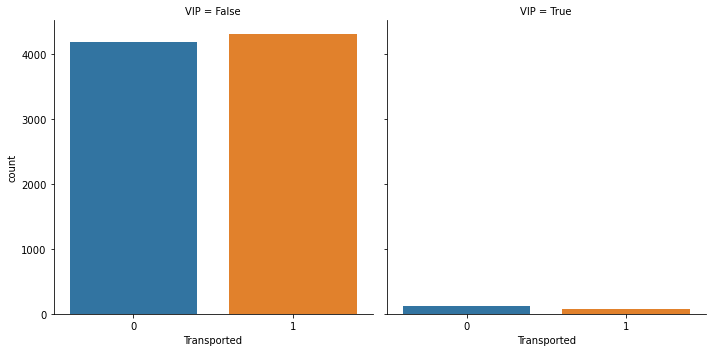

In [17]:
sns.catplot(x='Transported', col='VIP', kind='count', data=train)


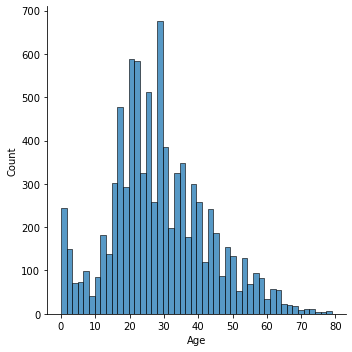

In [18]:
sns.displot(train.Age, kde=False)

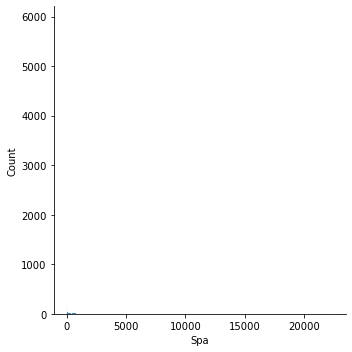

In [95]:
sns.displot(train.Spa, kde=False)

Transported
0    AxesSubplot(0.125,0.125;0.775x0.755)
1    AxesSubplot(0.125,0.125;0.775x0.755)
Name: Age, dtype: object

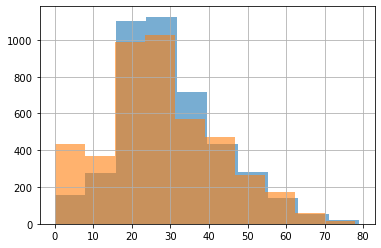

In [19]:
train.groupby('Transported').Age.hist(alpha=0.6)

Transported
0    AxesSubplot(0.125,0.125;0.775x0.755)
1    AxesSubplot(0.125,0.125;0.775x0.755)
Name: deck, dtype: object

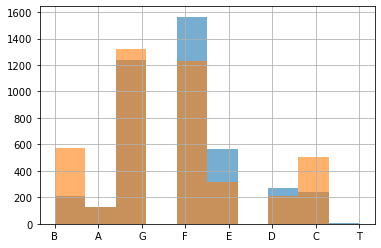

In [20]:
train.groupby('Transported').deck.hist(alpha=0.6)


Transported
0    AxesSubplot(0.125,0.125;0.775x0.755)
1    AxesSubplot(0.125,0.125;0.775x0.755)
Name: side, dtype: object

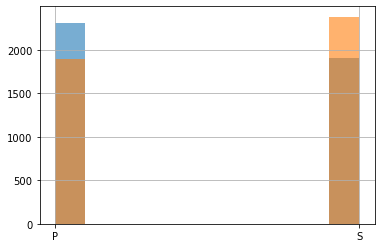

In [21]:
train.groupby('Transported').side.hist(alpha=0.6)


Transported
0    AxesSubplot(0.125,0.125;0.775x0.755)
1    AxesSubplot(0.125,0.125;0.775x0.755)
Name: Spa, dtype: object

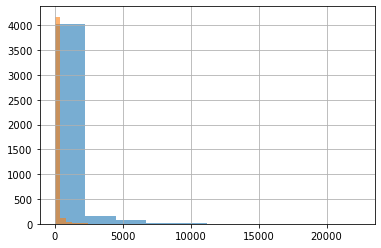

In [22]:
train.groupby('Transported').Spa.hist(alpha=0.6)


In [23]:
combined = train.VRDeck.add(train.RoomService).add(train.Spa)

In [24]:
train = train.assign(Combined=combined)

<AxesSubplot:xlabel='Transported'>

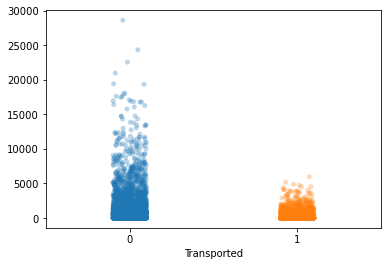

In [25]:
sns.stripplot(x=train.Transported, y=combined,
              data=train, alpha=0.3, jitter=True)


In [296]:
sns.stripplot(x=train.Transported, y=train.TravelGroup,
              data=train, alpha=0.3, jitter=True)


ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

<AxesSubplot:xlabel='Transported', ylabel='VRDeck'>

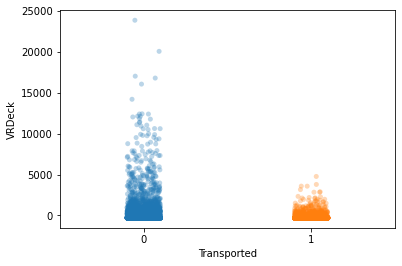

In [257]:
sns.stripplot(x=train.Transported, y=train.VRDeck - train.VRDeck.mean(),
              data=train, alpha=0.3, jitter=True)


<AxesSubplot:xlabel='Transported', ylabel='VRDeck'>

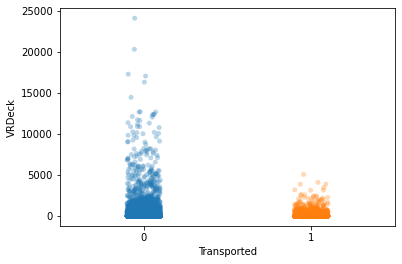

In [26]:
sns.stripplot(x='Transported', y=train.VRDeck, data=train, alpha=0.3, jitter=True)

<AxesSubplot:xlabel='Transported', ylabel='VRDeck'>

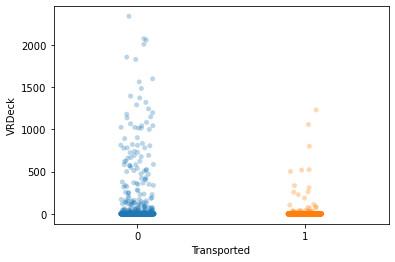

In [59]:
sns.stripplot(x='Transported', y=mars.VRDeck,
              data=mars, alpha=0.3, jitter=True)


<AxesSubplot:xlabel='Transported', ylabel='Age'>

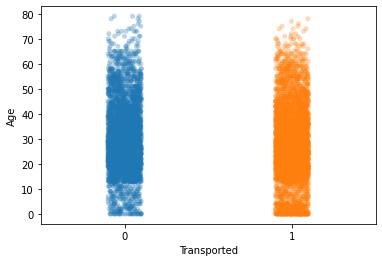

In [27]:
sns.stripplot(x='Transported', y=train.Age,
              data=train, alpha=0.3, jitter=True)


<AxesSubplot:xlabel='Transported', ylabel='Age'>

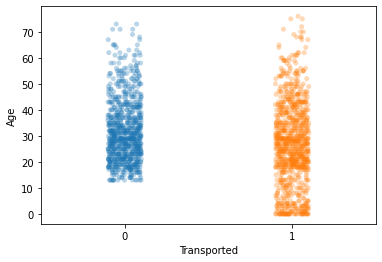

In [60]:
sns.stripplot(x='Transported', y=mars.Age,
              data=mars, alpha=0.3, jitter=True)


<AxesSubplot:xlabel='Transported', ylabel='RoomService'>

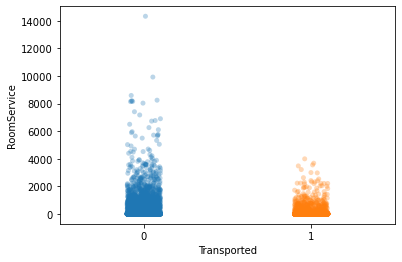

In [28]:
sns.stripplot(x='Transported', y=train.RoomService,
              data=train, alpha=0.3, jitter=True)


<AxesSubplot:xlabel='Transported', ylabel='RoomService'>

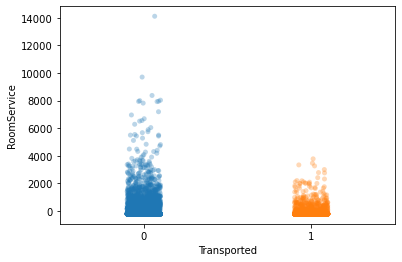

In [258]:
sns.stripplot(x='Transported', y=train.RoomService - train.RoomService.mean(),
              data=train, alpha=0.3, jitter=True)


<AxesSubplot:xlabel='Transported', ylabel='RoomService'>

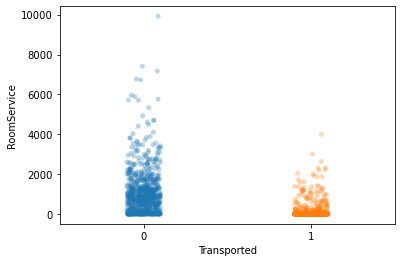

In [61]:
sns.stripplot(x='Transported', y='RoomService',
              data=mars, alpha=0.3, jitter=True)


<AxesSubplot:xlabel='Transported', ylabel='FoodCourt'>

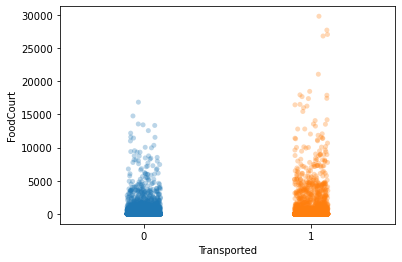

In [29]:
sns.stripplot(x='Transported', y=train.FoodCourt,
              data=train, alpha=0.3, jitter=True)


<AxesSubplot:xlabel='Transported', ylabel='FoodCourt'>

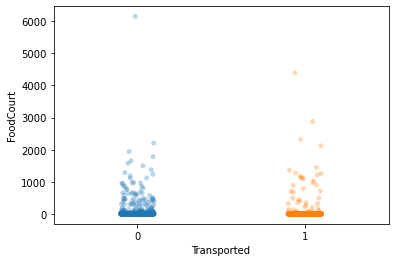

In [62]:
sns.stripplot(x='Transported', y='FoodCourt',
              data=mars, alpha=0.3, jitter=True)


<AxesSubplot:xlabel='Transported', ylabel='ShoppingMall'>

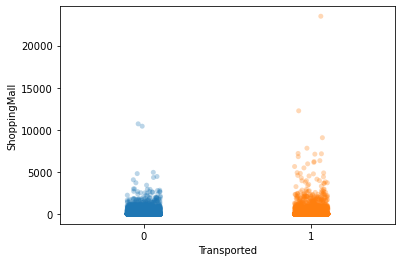

In [30]:
sns.stripplot(x='Transported', y=train.ShoppingMall,
              data=train, alpha=0.3, jitter=True)


<AxesSubplot:xlabel='Transported', ylabel='Spa'>

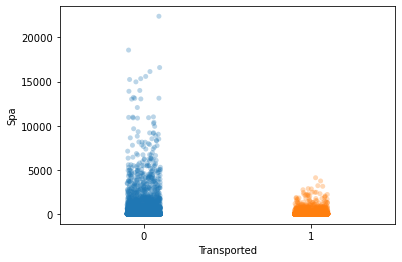

In [31]:
sns.stripplot(x='Transported', y=train.Spa,
              data=train, alpha=0.3, jitter=True)

<AxesSubplot:xlabel='Transported', ylabel='Spa'>

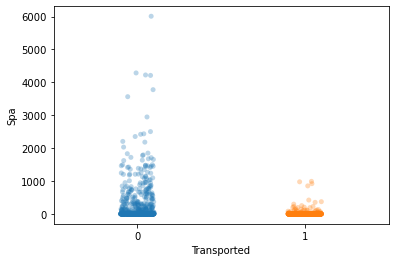

In [63]:
sns.stripplot(x='Transported', y='Spa',
              data=mars, alpha=0.3, jitter=True)


<AxesSubplot:xlabel='Transported'>

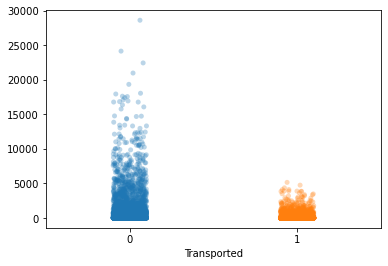

In [64]:
s_vr = train.Spa + train.VRDeck
sns.stripplot(x='Transported', y=s_vr,
              data=train, alpha=0.3, jitter=True)


<AxesSubplot:xlabel='Transported'>

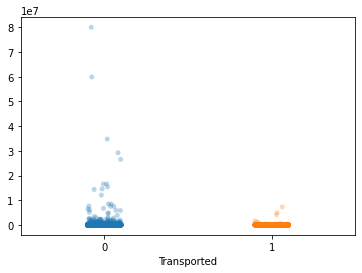

In [263]:
s2 = train.RoomService * train.Spa
sns.stripplot(x='Transported', y=s2,
              data=train, alpha=0.3, jitter=True)


In [264]:
s2

0            0.0
1        59841.0
2       288745.0
3            0.0
4       171195.0
          ...   
8688         0.0
8689         0.0
8690         0.0
8691         0.0
8692         0.0
Length: 8693, dtype: float64

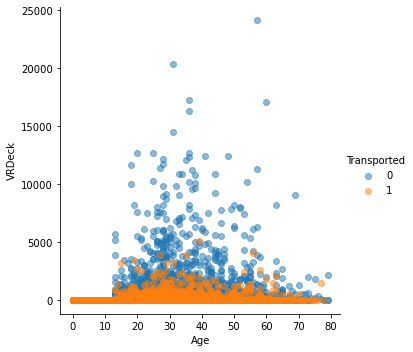

In [32]:
sns.lmplot(x='Age', y='VRDeck', hue='Transported', data=train, fit_reg=False, scatter_kws={'alpha':0.5})

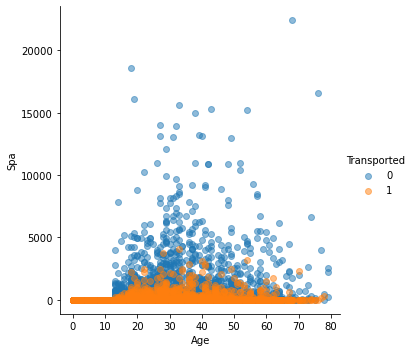

In [33]:
sns.lmplot(x='Age', y='Spa', hue='Transported', data=train, fit_reg=False, scatter_kws={'alpha':0.5})

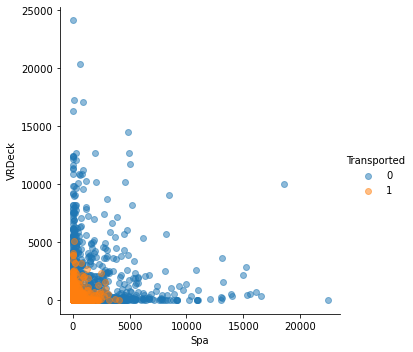

In [34]:
sns.lmplot(x='Spa', y='VRDeck', hue='Transported', data=train, fit_reg=False, scatter_kws={'alpha':0.5})

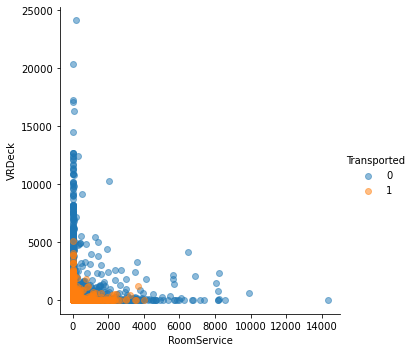

In [259]:
sns.lmplot(x='RoomService', y='VRDeck', hue='Transported', data=train, fit_reg=False, scatter_kws={'alpha':0.5})

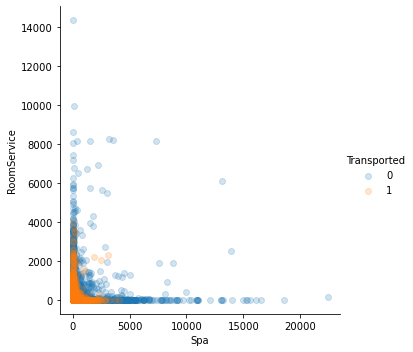

In [261]:
sns.lmplot(x='Spa', y='RoomService', hue='Transported', data=train, fit_reg=False, scatter_kws={'alpha':0.2})

In [262]:
train.Spa * train.RoomService

0            0.0
1        59841.0
2       288745.0
3            0.0
4       171195.0
          ...   
8688         0.0
8689         0.0
8690         0.0
8691         0.0
8692         0.0
Length: 8693, dtype: float64

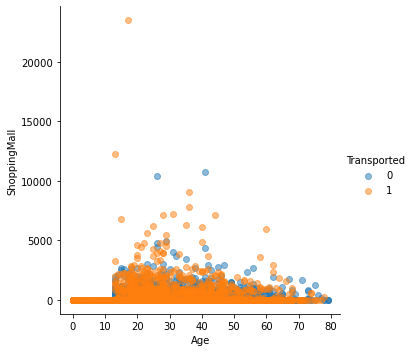

In [35]:
sns.lmplot(x='Age', y='ShoppingMall', hue='Transported', data=train, fit_reg=False, scatter_kws={'alpha':0.5})

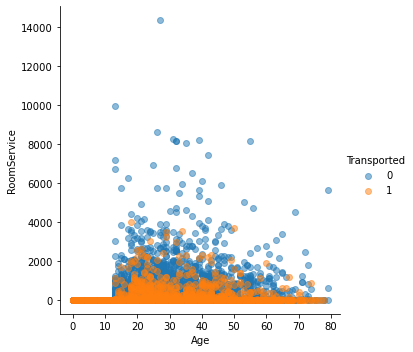

In [36]:
sns.lmplot(x='Age', y='RoomService', hue='Transported', data=train, fit_reg=False, scatter_kws={'alpha':0.5})

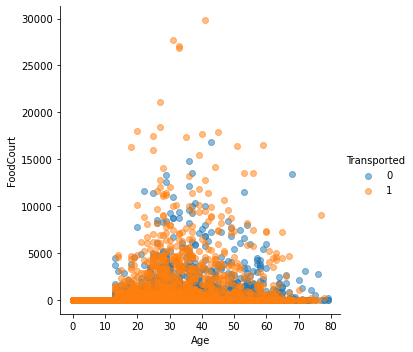

In [37]:
sns.lmplot(x='Age', y='FoodCourt', hue='Transported', data=train, fit_reg=False, scatter_kws={'alpha':0.5})

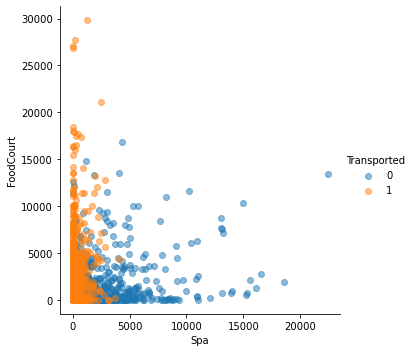

In [38]:
sns.lmplot(x='Spa', y='FoodCourt', hue='Transported', data=train, fit_reg=False, scatter_kws={'alpha':0.5})

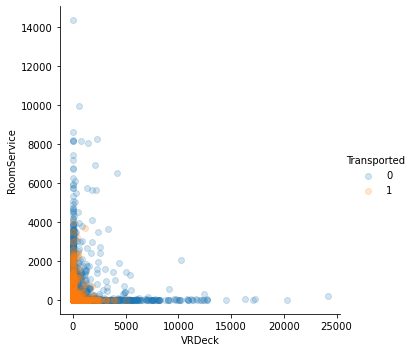

In [66]:
sns.lmplot(x='VRDeck', y='RoomService', hue='Transported', data=train, fit_reg=False, scatter_kws={'alpha':0.2})

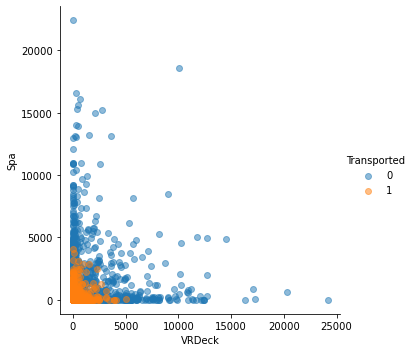

In [40]:
sns.lmplot(x='VRDeck', y='Spa', hue='Transported', data=train, fit_reg=False, scatter_kws={'alpha':0.5})

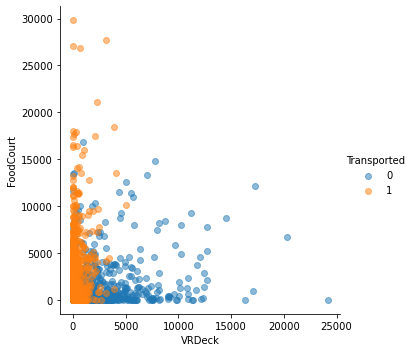

In [67]:
sns.lmplot(x='VRDeck', y='FoodCourt', hue='Transported', data=train, fit_reg=False, scatter_kws={'alpha':0.5})

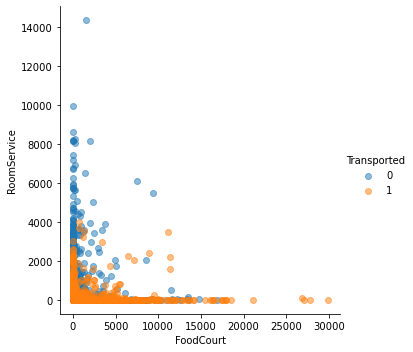

In [41]:
sns.lmplot(x='FoodCourt', y='RoomService', hue='Transported', data=train, fit_reg=False, scatter_kws={'alpha':0.5})

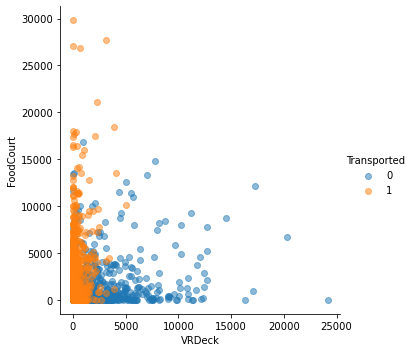

In [42]:
sns.lmplot(x='VRDeck', y='FoodCourt', hue='Transported', data=train, fit_reg=False, scatter_kws={'alpha':0.5})

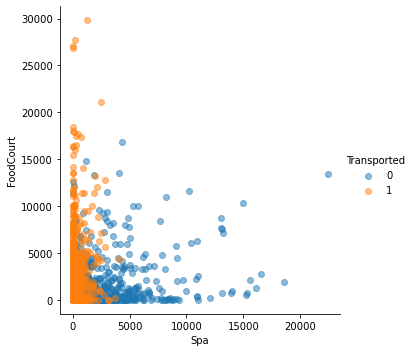

In [43]:
sns.lmplot(x='Spa', y='FoodCourt', hue='Transported', data=train, fit_reg=False, scatter_kws={'alpha':0.5})

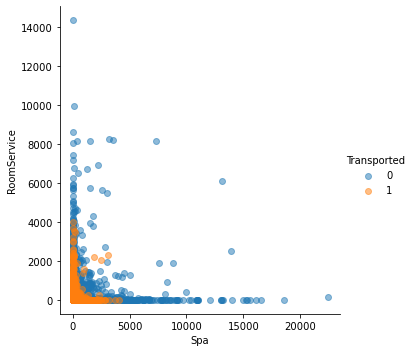

In [68]:
sns.lmplot(x='Spa', y='RoomService', hue='Transported', data=train, fit_reg=False, scatter_kws={'alpha':0.5})

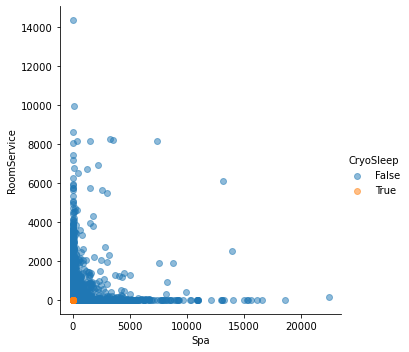

In [71]:
sns.lmplot(x='Spa', y='RoomService', hue='CryoSleep', data=train, fit_reg=False, scatter_kws={'alpha':0.5})

In [97]:
train = pd.get_dummies(data=train, columns=['HomePlanet', 'deck', 'side'])

In [45]:
train

,PassengerId,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,...,deck_A,deck_B,deck_C,deck_D,deck_E,deck_F,deck_G,deck_T,side_P,side_S
0,0001_01,False,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,...,0,1,0,0,0,0,0,0,1,0
1,0002_01,False,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,...,0,0,0,0,0,1,0,0,0,1
2,0003_01,False,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,...,1,0,0,0,0,0,0,0,0,1
3,0003_02,False,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,...,1,0,0,0,0,0,0,0,0,1
4,0004_01,False,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,...,0,0,0,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,False,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,...,1,0,0,0,0,0,0,0,1,0
8689,9278_01,True,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,1,0,0,1
8690,9279_01,False,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,...,0,0,0,0,0,0,1,0,0,1
8691,9280_01,False,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,...,0,0,0,0,1,0,0,0,0,1


In [162]:
train.Mars_Child

0       NaN
1       NaN
2       NaN
3       NaN
4       NaN
       ... 
8688    NaN
8689    NaN
8690    NaN
8691    NaN
8692    NaN
Name: Mars_Child, Length: 8693, dtype: object

In [163]:
mars_child

12      False
16      False
18      False
27      False
31      False
        ...  
8654     True
8655    False
8660    False
8661    False
8668    False
Name: Age, Length: 1759, dtype: bool

In [160]:
train["Mars_Child"].value_counts()

False    1602
True      157
Name: Mars_Child, dtype: int64

In [118]:
from sklearn.model_selection import train_test_split

In [161]:
train

,PassengerId,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,...,deck_C,deck_D,deck_E,deck_F,deck_G,deck_T,side_P,side_S,Child,Mars_Child
0,0001_01,False,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,1,0,False,NaN
1,0002_01,False,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,...,0,0,0,1,0,0,0,1,False,NaN
2,0003_01,False,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,...,0,0,0,0,0,0,0,1,False,NaN
3,0003_02,False,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,...,0,0,0,0,0,0,0,1,False,NaN
4,0004_01,False,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,...,0,0,0,1,0,0,0,1,False,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,False,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,...,0,0,0,0,0,0,1,0,False,NaN
8689,9278_01,True,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,1,0,0,1,False,NaN
8690,9279_01,False,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,...,0,0,0,0,1,0,0,1,False,NaN
8691,9280_01,False,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,...,0,0,1,0,0,0,0,1,False,NaN


ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

In [276]:

comb = train.Spa + train.VRDeck + train.RoomService + train.FoodCourt
train = train.assign(Comb=comb)

corr_matrix = train.corr()
corr_matrix['Transported'].sort_values(ascending=False)


Transported          1.000000
CryoSleep            0.460132
HomePlanet_Europa    0.176916
deck_B               0.144733
Child                0.122363
deck_C               0.108193
side_S               0.101455
FoodCourt            0.045583
HomePlanet_Mars      0.019544
deck_G               0.016269
ShoppingMall         0.009391
deck_A              -0.002623
deck_T              -0.014568
deck_D              -0.034046
VIP                 -0.037261
Age                 -0.074249
deck_F              -0.087753
deck_E              -0.097965
side_P              -0.101397
HomePlanet_Earth    -0.169019
VRDeck              -0.204874
Comb                -0.206599
Spa                 -0.218545
RoomService         -0.241124
Name: Transported, dtype: float64

In [268]:
#columns= ['Age', 'VRDeck', 'RoomService', 'Spa','FoodCourt', 'CryoSleep', 'HomePlanet_Earth', 'HomePlanet_Europa', 'HomePlanet_Mars', 'deck_A', 'deck_B', 'deck_C', 'deck_D', 'deck_E', 'deck_F', 'deck_G', 'deck_T', 'side_P', 'side_S']
columns = ['VRDeck', 'RoomService', 'Spa','CryoSleep','Comb',  'Child']

X = train[columns]
y = train.Transported

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)



In [214]:

X_train.isna().sum()


Comb                 0
CryoSleep            0
HomePlanet_Earth     0
HomePlanet_Europa    0
HomePlanet_Mars      0
side_P               0
side_S               0
deck_B               0
deck_C               0
Child                0
dtype: int64

In [100]:
from sklearn.ensemble import RandomForestClassifier

In [269]:
rfc = RandomForestClassifier()
rfc.fit(X=X_train, y=y_train)

RandomForestClassifier()

In [216]:
from xgboost import XGBClassifier
xgb = XGBClassifier(objective="binary:logistic")
xgb.fit(X_train, y_train)


[00:58:51] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\c3a1r\anaconda3\envs\ML\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=24,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [270]:
y_pred_train = rfc.predict(X_train)

In [271]:
accuracy_score(y_train, y_pred_train)


0.8903861955628595

In [223]:
y_pred_xgb = xgb.predict(X_train)

ValueError: Feature shape mismatch, expected: 10, got 13

In [272]:
y_pred_test = rfc.predict(X_test)

In [273]:
accuracy_score(y_test, y_pred_test)

0.7480828220858896

In [116]:
accuracy_score(y_train, y_pred_xgb)

0.8221557575060393